<a href="https://colab.research.google.com/github/tiaracantiq/gitgithub/blob/main/Data_Analysis_and_Visualization_of_Customer_Behavior_Using_Logistic_Regression_and_K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd, numpy as np
import seaborn as sns, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (classification_report,
confusion_matrix, roc_curve, roc_auc_score)
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
import pandas as pd

file_path = '/content/drive/My Drive/Praktikum SIAB/Dataset Praktikum1/Mall_Customers.csv'
df = pd.read_csv(file_path)

print("Data awal:")
print(df.head())


Data awal:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


Exploratory Data Analyse (EDA)

In [6]:
df.info()
df.describe()
df.isnull().sum()
df.duplicated().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


np.int64(0)

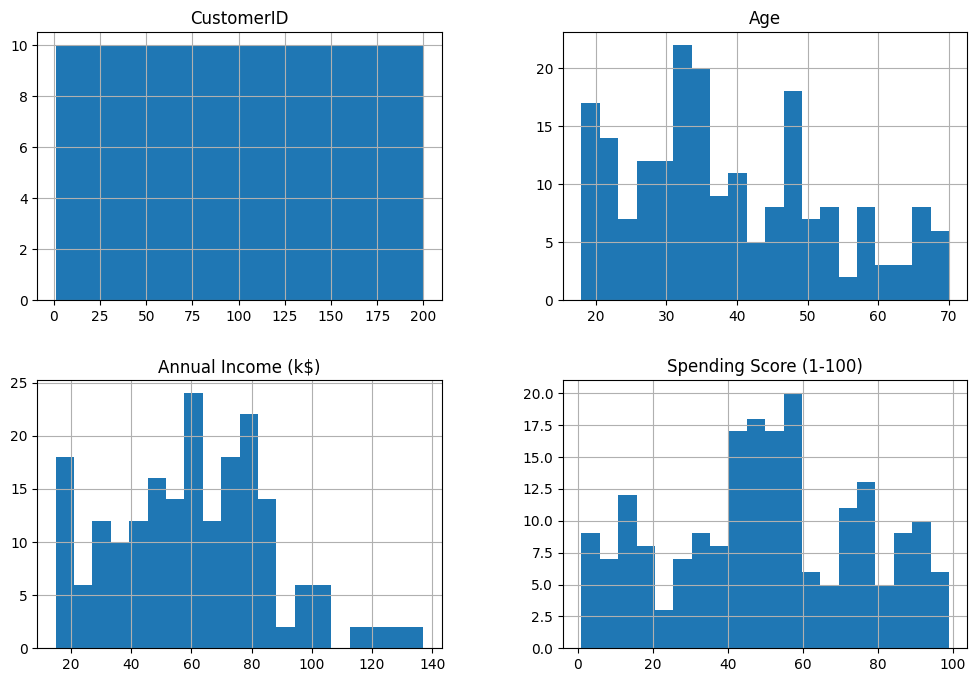

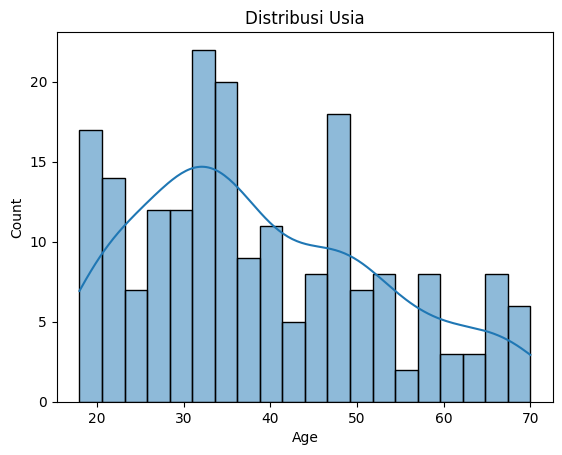

In [8]:
# Checking Distribution Fitur Numeric
import matplotlib.pyplot as plt

df.hist(bins=20, figsize=(12,8))
plt.show()

# Checking Age Distribution
sns.histplot(df["Age"],bins=20,kde=True);
plt.title("Distribusi Usia");
plt.show()


Scatter Plot

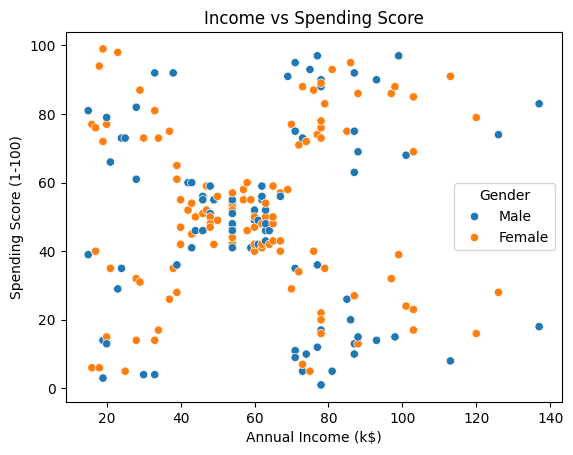

In [10]:
# Scatter Income vs Spending Score (warna = Gender)
sns.scatterplot(
    data=df,
    x="Annual Income (k$)",
    y="Spending Score (1-100)",
    hue="Gender"
)

plt.title("Income vs Spending Score")
plt.show()


Boxplot

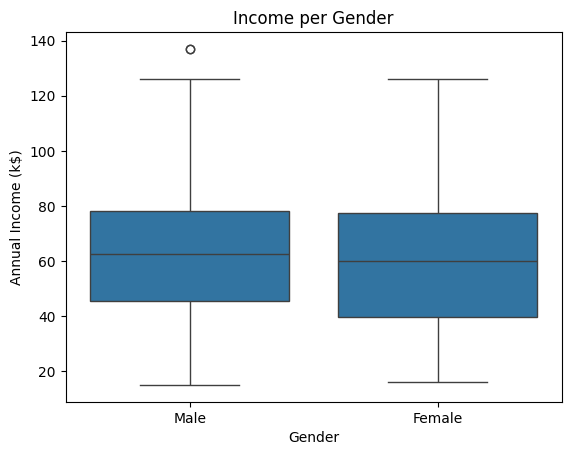

In [11]:
#boxplot Income per Gender
sns.boxplot(data=df, x="Gender", y="Annual Income (k$)");
plt.title("Income per Gender"); plt.show()


Heatmap

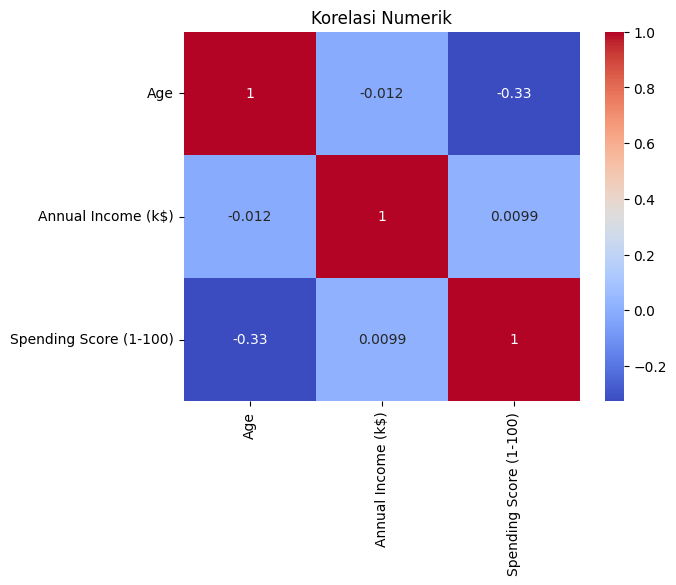

In [12]:
#korelasi numerik
num_cols = ["Age","Annual Income (k$)","Spending Score (1-100)"]
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm");
plt.title("Korelasi Numerik");
plt.show()

Preproccesing

In [14]:
from sklearn.preprocessing import LabelEncoder

# inisialisasi LabelEncoder
le = LabelEncoder()

# mengubah teks menjadi angka
df['Gender'] = le.fit_transform(df['Gender'])

# menampilkan hasil encoding
print("Label hasil encoding untuk kolom Gender:")
print(df['Gender'].unique())


Label hasil encoding untuk kolom Gender:
[1 0]


Classificatin

In [15]:
#membuat label klasifikasi (Purchased)
df['Purchased'] = (df['Spending Score (1-100)'] > 50).astype(int)
print("\nLabel hasil klasifikasi (Purchased):")
print(df['Purchased'].unique())



Label hasil klasifikasi (Purchased):
[0 1]


Normalization

In [17]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# inisialisasi StandardScaler
scaler = StandardScaler()

# menentukan fitur numerik yang akan dinormalisasi
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# melakukan normalisasi
scaled_features = scaler.fit_transform(df[features])

# membuat DataFrame baru hasil scaling
scaled_df = pd.DataFrame(scaled_features, columns=features)

# menambahkan kembali kolom kategorikal (jika ada)
scaled_df['Gender'] = df['Gender']

# menampilkan hasil normalisasi
print("Data setelah normalisasi:")
scaled_df.head()


Data setelah normalisasi:


,Age,Annual Income (k$),Spending Score (1-100),Gender
0,-1.424569,-1.738999,-0.434801,1
1,-1.281035,-1.738999,1.195704,1
2,-1.352802,-1.700830,-1.715913,0
3,-1.137502,-1.700830,1.040418,0
4,-0.563369,-1.662660,-0.395980,0


Classification

              precision    recall  f1-score   support

           0       0.65      0.52      0.58        21
           1       0.57      0.68      0.62        19

    accuracy                           0.60        40
   macro avg       0.61      0.60      0.60        40
weighted avg       0.61      0.60      0.60        40



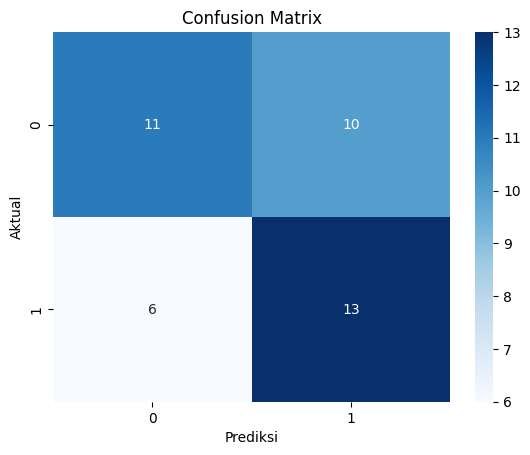

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Membuat label dummy: Spending Score > 50 dianggap Purchased
df["Purchased"] = (df["Spending Score (1-100)"] > 50).astype(int)

# fitur untuk modeling
X_cls = df[["Age", "Annual Income (k$)", "Gender"]]
y = df["Purchased"]

# train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_cls, y, test_size=0.2, stratify=y, random_state=42
)

# scaling
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

# logistic regression
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_s, y_train)

y_pred = logreg.predict(X_test_s)
y_proba = logreg.predict_proba(X_test_s)[:, 1]

print(classification_report(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Confusion Matrix")
plt.show()


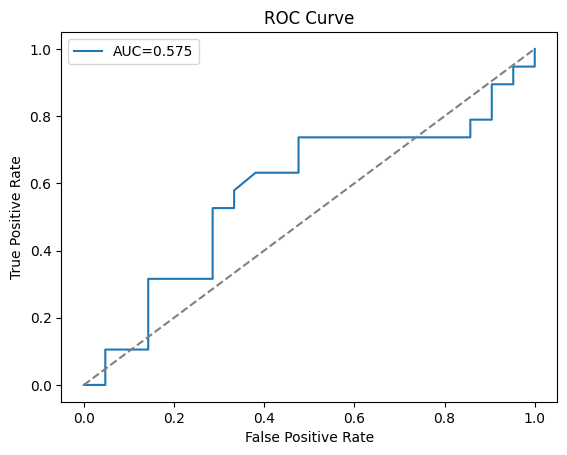

In [21]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba, pos_label=1)
auc = roc_auc_score(y_test, y_proba)

plt.plot(fpr, tpr, label=f"AUC={auc:.3f}")
plt.plot([0,1], [0,1], '--', c='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


Clustering


Evakuasi K-Means

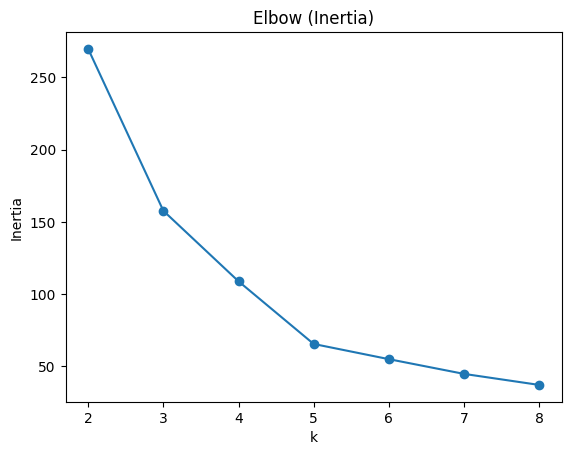

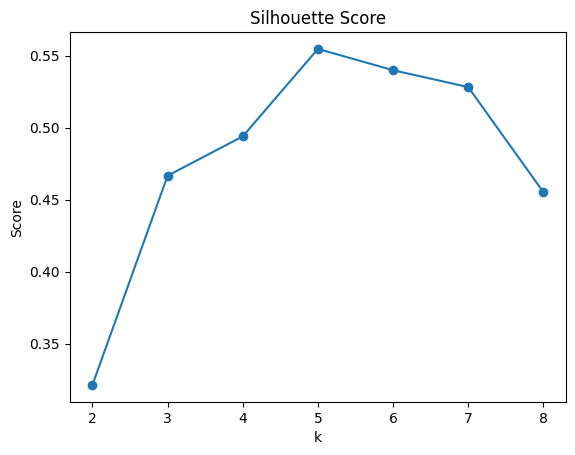

In [24]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# fitur clustering
X_clu = df[["Annual Income (k$)", "Spending Score (1-100)"]].values

# scaling
X_clu_s = StandardScaler().fit_transform(X_clu)

# mencari k terbaik
inertia, sils = [], []
Ks = range(2, 9)

for k in Ks:
    km = KMeans(n_clusters=k, n_init=10, random_state=42).fit(X_clu_s)
    inertia.append(km.inertia_)
    sils.append(silhouette_score(X_clu_s, km.labels_))

# plot elbow
plt.plot(Ks, inertia, "-o")
plt.title("Elbow (Inertia)")
plt.xlabel("k")
plt.ylabel("Inertia")
plt.show()

# plot silhouette
plt.plot(Ks, sils, "-o")
plt.title("Silhouette Score")
plt.xlabel("k")
plt.ylabel("Score")
plt.show()


Grafik Sillhote

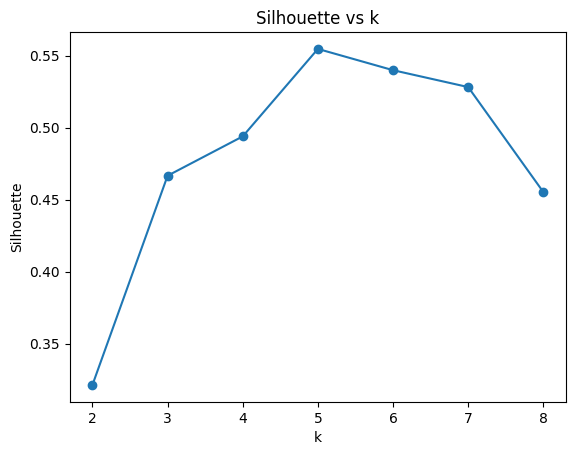

In [25]:
plt.plot(Ks, sils, "-o")
plt.title("Silhouette vs k")
plt.xlabel("k")
plt.ylabel("Silhouette")
plt.show()


Clustering Algorithm K-Means

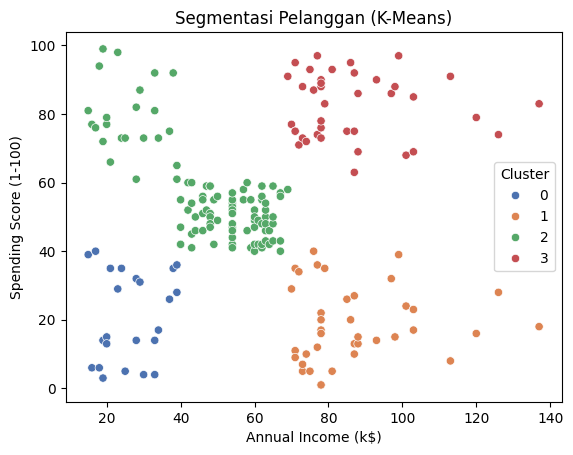

           Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                   
0        45.22               26.30                   20.91
1        40.39               87.00                   18.63
2        39.20               48.26                   56.48
3        32.69               86.54                   82.13


In [27]:
# memilih k (misal 4), lalu fit final
k = 4
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42).fit(X_clu_s)
df["Cluster"] = kmeans.labels_

# visualisasi cluster
sns.scatterplot(
    x="Annual Income (k$)",
    y="Spending Score (1-100)",
    hue="Cluster",
    palette="deep",
    data=df
)
plt.title("Segmentasi Pelanggan (K-Means)")
plt.show()

# profil cluster (rata-rata)
profile = df.groupby("Cluster")[["Age",
                                 "Annual Income (k$)",
                                 "Spending Score (1-100)"]].mean().round(2)

print(profile)
